Radius: 0.87617
[[Model]]
    Model(normal_float)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 85
    # variables        = 7
    chi-square         = 30.5502661
    reduced chi-square = 0.39167008
    Akaike info crit   = -72.9786181
    Bayesian info crit = -55.8800593
[[Variables]]
    c1:   7.81584276 +/- 0.14332380 (1.83%) (init = 9)
    ns1:  0.99938926 +/- 0.00179126 (0.18%) (init = 1)
    ns2:  0.99992269 +/- 0.00122156 (0.12%) (init = 1)
    nr:   0.99876162 +/- 0.00112580 (0.11%) (init = 1)
    nb1:  0.99148074 +/- 0.00141073 (0.14%) (init = 1)
    nb2:  0.98959605 +/- 0.00182410 (0.18%) (init = 1)
    nm:   0.99997264 +/- 0.00116969 (0.12%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, nb1)  = -0.897
    C(c1, nb2)  = -0.831
    C(c1, ns2)  = -0.769
    C(nb1, nb2) =  0.745
    C(c1, nm)   = -0.692
    C(ns2, nb1) =  0.690
    C(ns2, nb2) =  0.639
    C(nb1, nm)  =  0.621
    C(nb2, nm) 

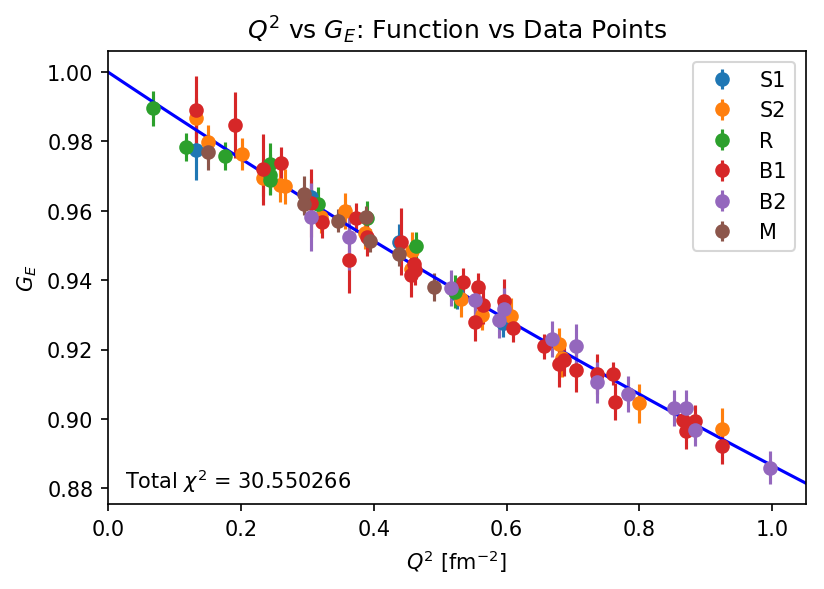

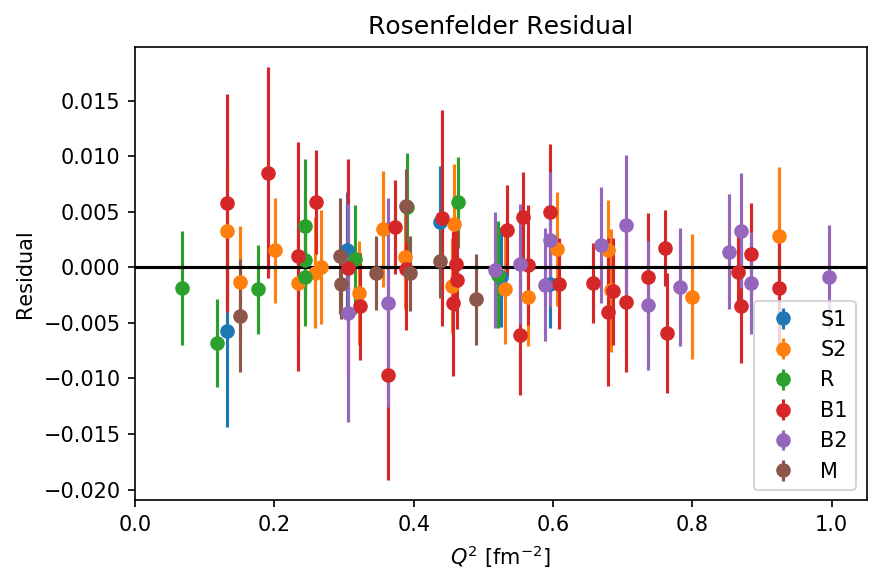

In [22]:
#Graph First Time
%matplotlib inline

##Import Packages
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters
import random

#Float Function for Modeling/Regression
def normal_float(Q2,ns1,ns2,nr,nb1,nb2,nm,c1):
    f1= ns1*((1+(S1[0:,0]/c1))**Power)
    f2= ns2*((1+(S2[0:,0]/c1))**Power)
    f3=  nr*((1+(R[0:,0]/c1))**Power)
    f4= nb1*((1+(B1[0:,0]/c1))**Power)
    f5= nb2*((1+(B2[0:,0]/c1))**Power)
    f6=  nm*((1+(M[0:,0]/c1))**Power)
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def float_multiply(Q2,ns1,ns2,nr,nb1,nb2,nm,c1):
    f1= ns1*((1+(S1[0:,0]*c1))**Power)
    f2= ns2*((1+(S2[0:,0]*c1))**Power)
    f3=  nr*((1+(R[0:,0]*c1))**Power)
    f4= nb1*((1+(B1[0:,0]*c1))**Power)
    f5= nb2*((1+(B2[0:,0]*c1))**Power)
    f6=  nm*((1+(M[0:,0]*c1))**Power)
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def float_1Param(Q2,c1,norm):
    F= norm*(1+Q2/c1)**Power
    return np.array((F))
def float_rational(Q2,ns1,ns2,nr,nb1,nb2,nm,c1,c2):
    f1= ns1*((1+(S1[0:,0]*c1))/(1+(S1[0:,0]*c2)))
    f2= ns2*((1+(S2[0:,0]*c1))/(1+(S2[0:,0]*c2)))
    f3=  nr*((1+(R[0:,0]*c1))/(1+(R[0:,0]*c2)))
    f4= nb1*((1+(B1[0:,0]*c1))/(1+(B1[0:,0]*c2)))
    f5= nb2*((1+(B2[0:,0]*c1))/(1+(B2[0:,0]*c2)))
    f6=  nm*((1+(M[0:,0]*c1))/(1+(M[0:,0]*c2)))
    return np.concatenate((f1,f2,f3,f4,f5,f6))

##Import Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R =np.loadtxt('+Rsort.dat' )
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M =np.loadtxt('+Msort.dat' )

############################################################################
##User Input
#Power
Power=-1
#Function (normal_float,float_multiply, or float_1Param)
Function=normal_float
#Coulomb Corrections (1 or 0)
C_Corr=0
############################################################################

Full_Param_Data=[]
##Generate Values
Q2=(np.concatenate((S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0])))
GE=np.concatenate((S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
Error=np.concatenate((S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
#Coulomb Correction
if C_Corr==1:
    coulomb_corr=np.concatenate((S1[0:,3],S2[0:,3],R[0:,3],B1[0:,3],B2[0:,3],M[0:,3]))
    GE=GE-coulomb_corr
                          
##Regression
#Parameters
params = Parameters()
params.add('c1',  value=9,vary=1)
if Function==float_rational:
    params.add('c2', value=1,vary=1)
if Function==float_1Param:
    params.add('norm',value=1,vary=1)
if Function!=float_1Param:
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

#Result
model=Model(Function)
result=model.fit(GE,Q2=Q2,params=params,weights=1/Error)
#Save Params to List
Real_Params=[]
for name, par in result.params.items():
    Param=round(par.value,5)
    Real_Params.append(Param)

##Fit Report
if Function==float_multiply:
    print('Radius:',round((((-6*np.abs(Power)*Real_Params[0])**2)**0.25),5))
if Function==float_rational:
    print('Radius:',round((((6*(Real_Params[1]-Real_Params[0]))**2)**0.25),5))
else:
    print('Radius:',round((((6*np.abs(Power)/Real_Params[0])**2)**0.25),5))

#Report
print(result.fit_report())

##Plot
#Formatting
plt.figure(dpi=150)
plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')
plt.xlim(0,1.05)

#Scatter Plot with Error Bars
#Initialize
plt.annotate('Total $\chi^2$ = %f'%result.chisqr,xy=(0.025,0.88))

#Plot Error Bars
Adjust=0
if Function==float_1Param:
    plt.errorbar(Q2,GE/Real_Params[1],yerr=Error,fmt='o',label='All')
if Function==float_rational:
    #With CC
    if C_Corr==1:
        plt.errorbar(S1[:,0],(S1[:,1]-S1[:,3])/Real_Params[2],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],(S2[:,1]-S2[:,3])/Real_Params[3],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],(R[:,1]-R[:,3])/Real_Params[4],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],(B1[:,1]-B1[:,3])/Real_Params[5],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],(B2[:,1]-B2[:,3])/Real_Params[6],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],(M[:,1]-M[:,3])/Real_Params[7],yerr=M[:,2],fmt='o',label='M')
    #Without CC
    else:
        plt.errorbar(S1[:,0],S1[:,1]/Real_Params[2],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],S2[:,1]/Real_Params[3],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],R[:,1]/Real_Params[4],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],B1[:,1]/Real_Params[5],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],B2[:,1]/Real_Params[6],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],M[:,1]/Real_Params[7],yerr=M[:,2],fmt='o',label='M')
else:        
    #With CC
    if C_Corr==1:
        plt.errorbar(S1[:,0],(S1[:,1]-S1[:,3])/Real_Params[1],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],(S2[:,1]-S2[:,3])/Real_Params[2],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],(R[:,1]-R[:,3])/Real_Params[3],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],(B1[:,1]-B1[:,3])/Real_Params[4],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],(B2[:,1]-B2[:,3])/Real_Params[5],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],(M[:,1]-M[:,3])/Real_Params[6],yerr=M[:,2],fmt='o',label='M')
    #Without CC
    else:
        plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],R[:,1]/Real_Params[3],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],M[:,1]/Real_Params[6],yerr=M[:,2],fmt='o',label='M')
    
#Total Difference(Vals-Model)
if Function==float_1Param:
    print("Total Difference:",np.sum(GE/Real_Params[1]-(1+Q2/Real_Params[0])**Power))
if Function==float_rational:
    NS1=(np.sum(S1[:,1]/Real_Params[2]-(1+S1[:,0]*Real_Params[0])/(1+S1[:,0]*Real_Params[1])))
    NS2=(np.sum(S2[:,1]/Real_Params[3]-(1+S2[:,0]*Real_Params[0])/(1+S2[:,0]*Real_Params[1])))
    NR=(np.sum(R[:,1]/Real_Params[4]-(1+R[:,0]*Real_Params[0])/(1+R[:,0]*Real_Params[1])))
    NB1=(np.sum(B1[:,1]/Real_Params[5]-(1+B1[:,0]*Real_Params[0])/(1+B1[:,0]*Real_Params[1])))
    NB2=(np.sum(B2[:,1]/Real_Params[6]-(1+B2[:,0]*Real_Params[0])/(1+B2[:,0]*Real_Params[1])))
    NM=(np.sum(M[:,1]/Real_Params[7]-(1+M[:,0]*Real_Params[0])/(1+M[:,0]*Real_Params[1])))
    print("Total Difference:",(NS1+NS2+NR+NB1+NB2+NM))
else:    
    NS1=(np.sum(S1[:,1]/Real_Params[1+Adjust]-(1+S1[:,0]/Real_Params[0])**Power))
    NS2=(np.sum(S2[:,1]/Real_Params[2+Adjust]-(1+S2[:,0]/Real_Params[0])**Power))
    NR=(np.sum(R[:,1]/Real_Params[3+Adjust]-(1+R[:,0]/Real_Params[0])**Power))
    NB1=(np.sum(B1[:,1]/Real_Params[4+Adjust]-(1+B1[:,0]/Real_Params[0])**Power))
    NB2=(np.sum(B2[:,1]/Real_Params[5+Adjust]-(1+B2[:,0]/Real_Params[0])**Power))
    NM=(np.sum(M[:,1]/Real_Params[6+Adjust]-(1+M[:,0]/Real_Params[0])**Power))
    print("Total Difference:",(NS1+NS2+NR+NB1+NB2+NM))

#Plot Curves
NP_Q2=np.linspace(0,1.05)
if Function==float_multiply:
    plt.plot(NP_Q2,(1+NP_Q2*Real_Params[0])**Power,color='blue')
if Function==float_rational:
    plt.plot(NP_Q2,(1+NP_Q2*Real_Params[0])/(1+NP_Q2*Real_Params[1]),color='blue')
else:
    plt.plot(NP_Q2,(1+NP_Q2/Real_Params[0])**Power,color='blue')
    
#print(np.sum(GE-(1+(Real_Params[0]/2000000)*Q2)**-2000000))
#print(np.sum(GE-(1+(Real_Params[0]/2)*Q2)**-2))
#print(np.sum(GE-(1+Real_Params[0]*Q2)**Power))
#plt.plot(Q2,(1+(Real_Params[0]/2000000)*Q2)**-2000000,color='green')
#plt.plot(Q2,(1+(Real_Params[0]/(Power*-1))*Q2)**Power,color='red')

#Finalize
plt.legend()
plt.show()


##Residual
#Setup
plt.figure(dpi=150)

#Scatter Plot (With Error Bars)
if Function==float_1Param:
    plt.errorbar(Q2,GE/Real_Params[1]-(1+Q2/Real_Params[0])**Power,yerr=Error,fmt='o',label='All')
if Function==float_multiply:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1+Adjust]-(1+S1[:,0]*Real_Params[0])**Power,yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2+Adjust]-(1+S2[:,0]*Real_Params[0])**Power,yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[3+Adjust]-(1+R[:,0]*Real_Params[0])**Power,yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4+Adjust]-(1+B1[:,0]*Real_Params[0])**Power,yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5+Adjust]-(1+B2[:,0]*Real_Params[0])**Power,yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[6+Adjust]-(1+M[:,0]*Real_Params[0])**Power,yerr=M[:,2],fmt='o',label='M')
if Function==float_rational:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[2]-((1+S1[:,0]*Real_Params[0])/(1+S1[:,0]*Real_Params[1])),yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[3]-((1+S2[:,0]*Real_Params[0])/(1+S2[:,0]*Real_Params[1])),yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[4]-((1+R[:,0]*Real_Params[0])/(1+R[:,0]*Real_Params[1])),yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[5]-((1+B1[:,0]*Real_Params[0])/(1+B1[:,0]*Real_Params[1])),yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[6]-((1+B2[:,0]*Real_Params[0])/(1+B2[:,0]*Real_Params[1])),yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[7]-((1+M[:,0]*Real_Params[0])/(1+M[:,0]*Real_Params[1])),yerr=M[:,2],fmt='o',label='M')
else:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1]-(1+S1[:,0]/Real_Params[0])**Power,yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2]-(1+S2[:,0]/Real_Params[0])**Power,yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[3]-(1+R[:,0]/Real_Params[0])**Power,yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4]-(1+B1[:,0]/Real_Params[0])**Power,yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5]-(1+B2[:,0]/Real_Params[0])**Power,yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[6]-(1+M[:,0]/Real_Params[0])**Power,yerr=M[:,2],fmt='o',label='M')

#X-Axis
plt.plot([0,1.05],[0,0],color='black')
plt.title('Rosenfelder Residual')
#Graph Limits
plt.xlim(0,1.05)
#Label, Legend, & Layout
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
#Save Graph as File
#plt.savefig('HiginbothamResidual.png')
#plt.show()

Radius: 0.87617
[[Model]]
    Model(Rational_Float)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 141
    # data points      = 85
    # variables        = 7
    chi-square         = 16.0841910
    reduced chi-square = 0.20620758
    Akaike info crit   = -127.509224
    Bayesian info crit = -110.410665
[[Variables]]
    c1:   7.77578298 +/- 0.11736703 (1.51%) (init = 0.12)
    ns1:  0.99985321 +/- 0.00152008 (0.15%) (init = 1)
    ns2:  0.99995568 +/- 8.8580e-04 (0.09%) (init = 1)
    nr:   1.00053658 +/- 9.2764e-04 (0.09%) (init = 1)
    nb1:  0.99149553 +/- 0.00116744 (0.12%) (init = 1)
    nb2:  0.98926159 +/- 0.00143474 (0.15%) (init = 1)
    nm:   0.99923897 +/- 8.4394e-04 (0.08%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, nb1)  = -0.929
    C(c1, nb2)  = -0.835
    C(c1, ns2)  = -0.808
    C(nb1, nb2) =  0.775
    C(c1, nm)   = -0.768
    C(ns2, nb1) =  0.751
    C(nb1, nm)  =  0.713
    C(c1, nr)   = -0.687
    C(ns2

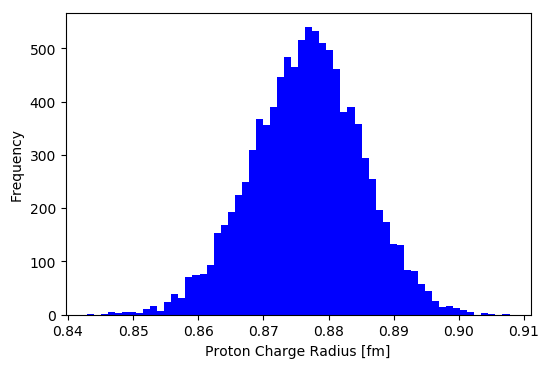

Mean: 27.7703 fm
Median: 27.56352 fm
σ: 4.73172 fm
Iterations: 10000


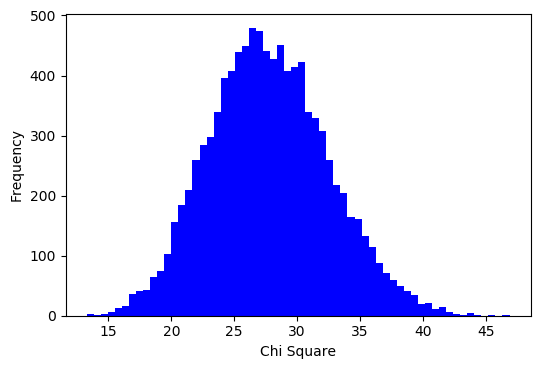

Mean: 0.9994 fm
Median: 0.99945 fm
σ: 0.0018 fm
Iterations: 10000


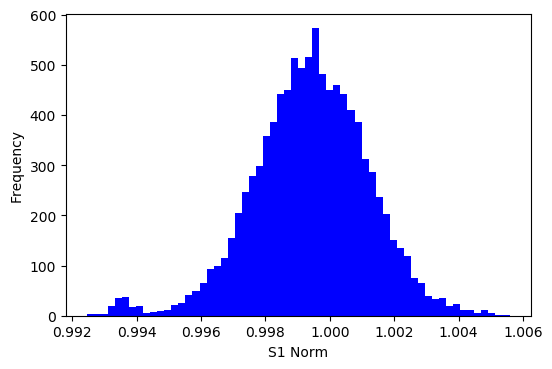

Mean: 0.99998 fm
Median: 1.0 fm
σ: 0.00111 fm
Iterations: 10000


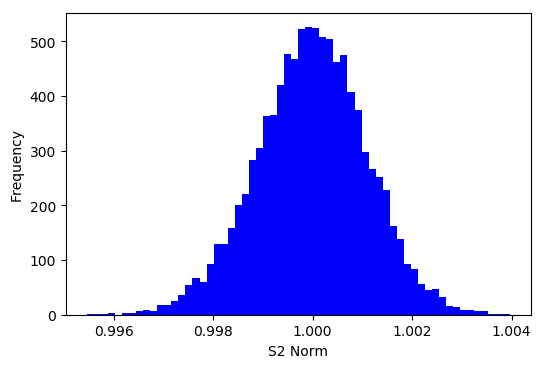

Mean: 0.99887 fm
Median: 0.99877 fm
σ: 0.00162 fm
Iterations: 10000


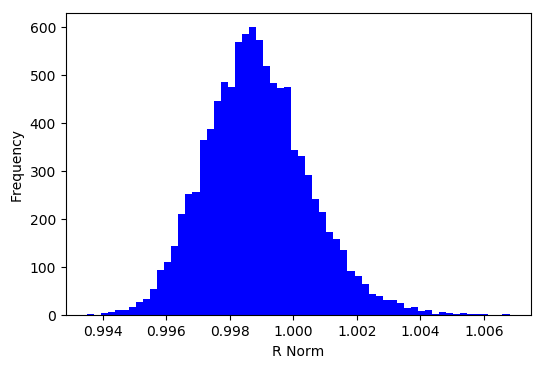

Mean: 0.99153 fm
Median: 0.99158 fm
σ: 0.00161 fm
Iterations: 10000


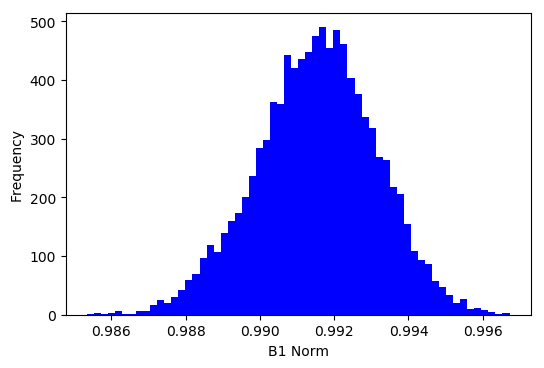

Mean: 0.98968 fm
Median: 0.98968 fm
σ: 0.0017 fm
Iterations: 10000


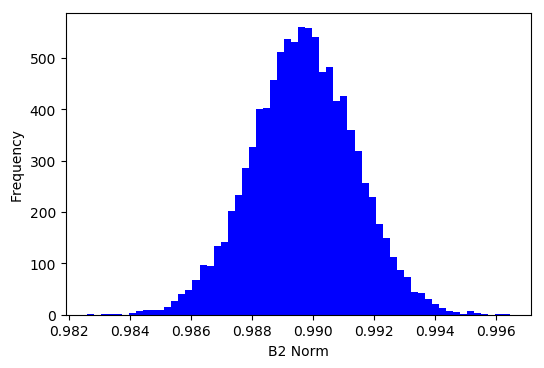

Mean: 1.0 fm
Median: 0.99993 fm
σ: 0.0014 fm
Iterations: 10000


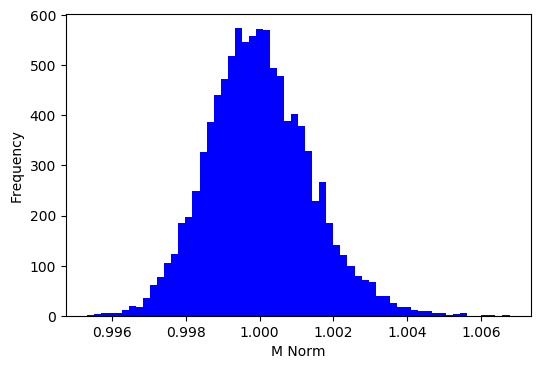

In [137]:
#Graph First Time
%matplotlib inline

##Function Storage
def Quad_Float(Boot_Q2,c1,c2,ns1,ns2,nr,nb1,nb2,nm):
    f1= ns1*(1+c1*S1_List+(c2*S1_List**2))
    f2= ns2*(1+c1*S2_List+(c2*S2_List**2))
    f3= nr* (1+c1*R_List+(c2*R_List**2))
    f4= nb1*(1+c1*B1_List+(c2*B1_List**2))
    f5= nb2*(1+c1*B2_List+(c2*B2_List**2))
    f6= nm* (1+c1*M_List+(c2*M_List**2))
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def Rational_Float(Boot_Q2,ns1,ns2,nr,nb1,nb2,nm,c1):
    f1= ns1*((1+(S1_List/c1))**Power)
    f2= ns2*((1+(S2_List/c1))**Power)
    f3=  nr*((1+(R_List/c1))**Power)
    f4= nb1*((1+(B1_List/c1))**Power)
    f5= nb2*((1+(B2_List/c1))**Power)
    f6=  nm*((1+(M_List/c1))**Power)
    return np.concatenate((f1,f2,f3,f4,f5,f6))

##Concatenate Data
Data=np.concatenate((S1,S2,R,B1,B2,M))

############################################################################
##User Input
#Power
Power=-1
#Function (Quad_Float or Rational_Float)
Function=Rational_Float
#Coulomb Corrections (1 or 0)
C_Corr=0
############################################################################

##Loop 
#Set Num Loops
Loop=10000
#Initialize Out Loop
Params,X,Adjust=[],0,0
while X<(Loop):
    #Initialize In Loop
    Q2,GE,Error,C_Corr,Set_Num=[],[],[],[],[]
    #Bootstrap
    for Z in range(len(Data)):
        Rand_Ele=np.random.randint(0,len(Data))
        Q2=np.append(Q2,Data[Rand_Ele][0])
        GE=np.append(GE,Data[Rand_Ele][1])
        Error=np.append(Error,Data[Rand_Ele][2])
        Clmb_Corr=np.append(C_Corr,Data[Rand_Ele][3])
        Set_Num.append(Data[Rand_Ele][4])
    #Coulumb Correction
    if C_Corr==1:
        GE=GE-Clmb_Corr
    
    #Separate Data By Set
    S1_List,S2_List,R_List,B1_List,B2_List,M_List=[],[],[],[],[],[]
    S1_Boot_GE,S2_Boot_GE,R_Boot_GE,B1_Boot_GE,B2_Boot_GE,M_Boot_GE=[],[],[],[],[],[]
    S1_Boot_Error,S2_Boot_Error,R_Boot_Error,B1_Boot_Error,B2_Boot_Error,M_Boot_Error=[],[],[],[],[],[]
    for B in range(len(Q2)):
        if Set_Num[B]==1:
            S1_List=np.append(S1_List,Q2[B])
            S1_Boot_GE=np.append(S1_Boot_GE,GE[B])
            S1_Boot_Error=np.append(S1_Boot_Error,Error[B])
        if Set_Num[B]==2:
            S2_List=np.append(S2_List,Q2[B])
            S2_Boot_GE=np.append(S2_Boot_GE,GE[B])
            S2_Boot_Error=np.append(S2_Boot_Error,Error[B])
        if Set_Num[B]==3:
            R_List=np.append(R_List,Q2[B])
            R_Boot_GE=np.append(R_Boot_GE,GE[B])
            R_Boot_Error=np.append(R_Boot_Error,Error[B])
        if Set_Num[B]==4:
            B1_List=np.append(B1_List,Q2[B])
            B1_Boot_GE=np.append(B1_Boot_GE,GE[B])
            B1_Boot_Error=np.append(B1_Boot_Error,Error[B])
        if Set_Num[B]==5:
            B2_List=np.append(B2_List,Q2[B])
            B2_Boot_GE=np.append(B2_Boot_GE,GE[B])
            B2_Boot_Error=np.append(B2_Boot_Error,Error[B])
        if Set_Num[B]==6:
            M_List=np.append(M_List,Q2[B])
            M_Boot_GE=np.append(M_Boot_GE,GE[B])
            M_Boot_Error=np.append(M_Boot_Error,Error[B])
    Boot_Q2=np.concatenate((S1_List,S2_List,R_List,B1_List,B2_List,M_List))
    Boot_GE=np.concatenate((S1_Boot_GE,S2_Boot_GE,R_Boot_GE,B1_Boot_GE,B2_Boot_GE,M_Boot_GE))
    Boot_Error=np.concatenate((S1_Boot_Error,S2_Boot_Error,R_Boot_Error,B1_Boot_Error,B2_Boot_Error,M_Boot_Error))

    #Check to Make Sure Each Set Does Not Have Zero Entries
    if len(S1_List)==0 or len(S2_List)==0 or len(R_List)==0 or len(B1_List)==0 or len(B2_List)==0 or len(M_List)==0:
        continue
        
    ##Regression
    #Parameters
    params=Parameters()
    params.add('c1',  value=0.12,vary=1)
    if Function==Quad_Float:
        params.add('c2',  value=random.gauss(0.014,0.00),vary=1)
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

    #Create Model
    model=Model(Function)
    result=model.fit(Boot_GE,Boot_Q2=Boot_Q2,params=params,weights=1/Boot_Error)
    #Save Params to List
    Mini_List=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Mini_List.append(Param)
    Mini_List.append(result.chisqr)
    Params.append(Mini_List)
    X+=1
    
#Print One to Test (Testing Purposes)
if Function==Rational_Float:
    print('Radius:',round((((6*np.abs(Power)/Real_Params[0])**2)**0.25),5))
else:
    print('Radius:',round((((-6*Mini_List[0])**2)**0.25),5))
print(result.fit_report())

##Plot
#Initialize
if Function==Quad_Float:
    c1=(((-6*c1)**2)**0.25)
    params_list=[c1,c2,chisqr,ns1,ns2,nr,nb1,nb2,nm]
    x_axis=['Proton Charge Radius [fm]','C2 Parameter','Chi Square','S1 Norm','S2 Norm','R Norm','B1 Norm','B2 Norm','M Norm']
elif Function==Rational_Float:
    c1=(((6*np.abs(Power)/c1)**2)**0.25)
    params_list=[c1,chisqr,ns1,ns2,nr,nb1,nb2,nm]
    x_axis=['Proton Charge Radius [fm]','Chi Square','S1 Norm','S2 Norm','R Norm','B1 Norm','B2 Norm','M Norm']
#Separate Data
c1,c2,ns1,ns2,nr,nb1,nb2,nm,chisqr=[],[],[],[],[],[],[],[],[]
if Function==Rational_Float:
    Adjust=1
for x in range(Loop):
    c1=np.append(c1,Params[x][0])
    if Function==Quad_Float:
        c2=np.append(c2,Params[x][1])
    ns1=np.append(ns1,Params[x][2-Adjust])
    ns2=np.append(ns2,Params[x][3-Adjust])
    nr=np.append(nr,Params[x][4-Adjust])
    nb1=np.append(nb1,Params[x][5-Adjust])
    nb2=np.append(nb2,Params[x][6-Adjust])
    nm=np.append(nm,Params[x][7-Adjust])
    chisqr=np.append(chisqr,Params[x][8-Adjust])
##Plot
def Analyze_Graph(Name,X_Axis,X):
    new_data=(Name)#-np.mean(Name))
    print('Mean:',round(np.mean(Name),5),'fm')
    print('Median:',round(np.median(Name),5),'fm')
    print('\u03C3:',round(np.std(Name),5),'fm')
    print('Iterations:',len(Name))
    #Plotting
    plt.figure(dpi=100)
    plt.hist(new_data,bins=60,color='blue')
    plt.ylabel('Frequency')
    plt.xlabel(X_Axis)
    plt.show()
for x in range(0,len(params_list)):
    Analyze_Graph(params_list[x],x_axis[x],x)

Radius: 0.82566
[[Model]]
    Model(float_norms)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 25
    # variables        = 4
    chi-square         = 95.6286776
    reduced chi-square = 4.55374655
    Akaike info crit   = 41.5399231
    Bayesian info crit = 46.4154264
[[Variables]]
    c1:     0.11361818 +/- 0.01141543 (10.05%) (init = -0.12)
    Set_1:  0.99989499 +/- 0.00383964 (0.38%) (init = 1)
    Set_2:  0.99973944 +/- 0.00245522 (0.25%) (init = 1)
    Set_3:  0.99988998 +/- 0.00250102 (0.25%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, Set_1)    =  0.952
    C(c1, Set_2)    =  0.559
    C(Set_1, Set_2) =  0.533
    C(c1, Set_3)    =  0.265
    C(Set_1, Set_3) =  0.252
    C(Set_2, Set_3) =  0.148



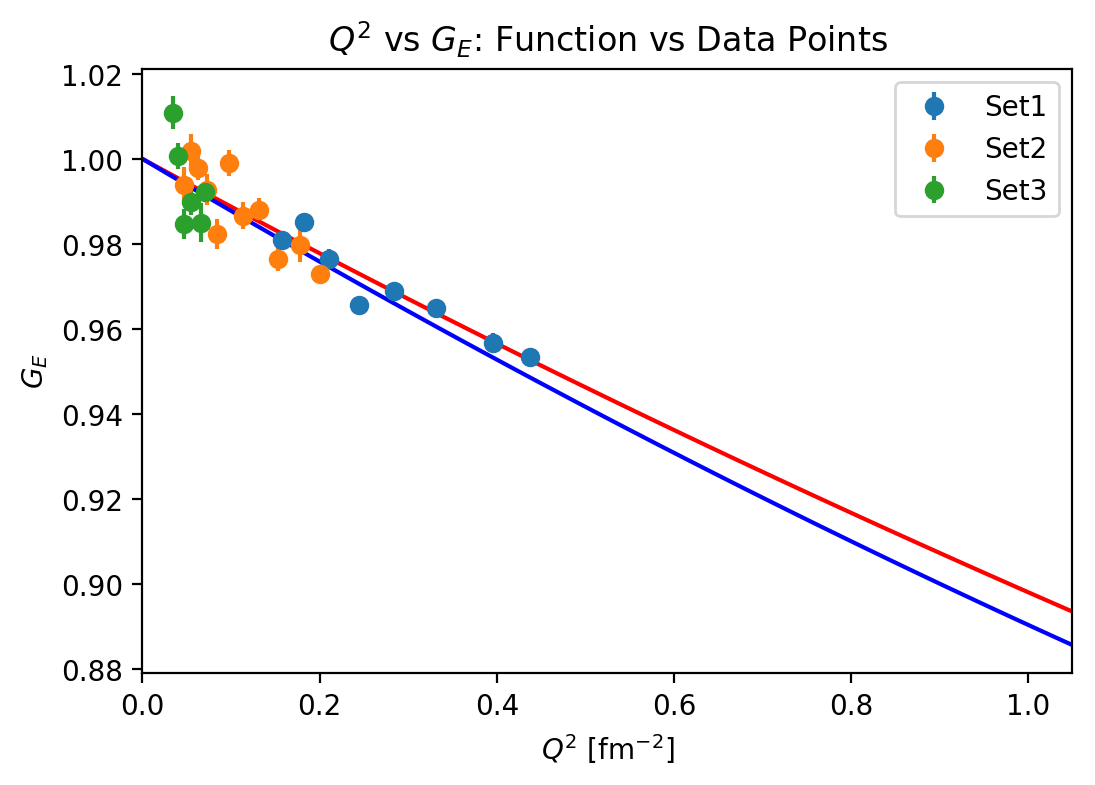

In [16]:
#Graph First Time
%matplotlib inline

##Import Packages
import random
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

##Function Storage
#Float Function for Modeling/Regression
def float_norms(q2,c1,Set_1,Set_2,Set_3):
    fSet1= Set_1*((1+c1*Set1[0:,0]*25.7)**Power)
    fSet2= Set_2*((1+c1*Set2[0:,0]*25.7)**Power)
    fSet3= Set_3*((1+c1*Set3[0:,0]*25.7)**Power)
    return np.concatenate((fSet1,fSet2,fSet3))

#Power
Power=-1

##Import Data (Data Used by Rosenfelder)
Set1=np.loadtxt('New_Data(0.495_GeV).dat')
Set2=np.loadtxt('New_Data(0.330_GeV).dat')
Set3=np.loadtxt('New_Data(0.195_GeV).dat')


##Generate Synthetic Data
#Super Loop (Loops Over Everything)
Loop=1
All_GE=[]
Real_Params=[]
X=0
while X<Loop:
    #Paramaters
    params = Parameters()
    params.add('c1',  value=-0.12,vary=1)
    #Normailization Parameters
    params.add('Set_1', value=1,vary=1)
    params.add('Set_2', value=1,vary=1)
    params.add('Set_3', value=1,vary=1)

    #Concatenation
    q2   = np.concatenate((Set1[0:,0]*25.7,Set2[0:,0]*25.7,Set3[0:,0]*25.7))
    data = np.concatenate((Set1[0:,3],Set2[0:,3],Set3[0:,3]))
    err  = np.concatenate((Set1[0:,2],Set2[0:,2],Set3[0:,2]))
    #err  = np.concatenate(((Set1[0:,2]**2+Set1[0:,5]**2)**0.5,(Set2[0:,2]**2+Set2[0:,5]**2)**0.5,(Set3[0:,2]**2+Set3[0:,5]**2)**0.5))
    
    #Create Model
    model=Model(float_norms)
    result=model.fit(data,q2=q2,params=params,weights=1/err)
    #Model Report
    Real_Params=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Real_Params.append(Param)        
    X+=1

#Print One to Test
print('Radius:',round((((-6*Real_Params[0])**2)**0.25),5))
print(result.fit_report())
    
##Plot (Plot Function & Last Set of Random Points)
#Analyze Data
c1=Real_Params[0]
#Plot 1
plt.figure(dpi=200)
plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')
#Scatter Plot With Error Bars
plt.errorbar(Set1[:,0]*25.7,Set1[:,3]/Real_Params[1],yerr=Set1[:,2],fmt='o',label='Set1')
plt.errorbar(Set2[:,0]*25.7,Set2[:,3]/Real_Params[2],yerr=Set2[:,2],fmt='o',label='Set2')
plt.errorbar(Set3[:,0]*25.7,Set3[:,3]/Real_Params[3],yerr=Set3[:,2],fmt='o',label='Set3')
plt.xlim(0,1.05)
q2=np.linspace(0,1.05)
plt.plot(q2,(1+Real_Params[0]*q2)**Power,color='red')

#Controls
#Rosenfelder
plt.plot(q2,1+-0.12371738*q2+0.014*q2**2,color='blue')


plt.legend()
plt.show()

In [54]:
from iminuit import Minuit

def f(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2

m = Minuit(f)

m.migrad()  # run optimiser
print(m.values)  # {'x': 2,'y': 3,'z': 4}

m.hesse()   # run covariance estimator
print(m.errors)  # {'x': 1,'y': 1,'z': 1}


<ValueView of Minuit at 1840ffb4288>
  x: 2.0000000000047327
  y: 3.000000000007099
  z: 4.000000000009465
<ErrorView of Minuit at 1840ffb4288>
  x: 1.0000000000000402
  y: 0.9999999999999426
  z: 1.0000000000001645


C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter x does not have initial value. Assume 0.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter x is floating but does not have initial step size. Assume 1.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter y does not have initial value. Assume 0.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter y is floating but does not have initial step size. Assume 1.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter z does not have initial value. Assume 0.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter z is floating but does not have initial step size. Assume 1.
  
C:\Users\17578\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWa